In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
params = {'legend.fontsize': '22',
          'figure.figsize': (10, 8),
         'axes.labelsize': '22',
         'axes.titlesize':'22',
         'xtick.labelsize':'22',
         'ytick.labelsize':'22'}
plt.rcParams.update(params)
FOLDER = r'Actuator Tests'
COL_NAMES = ['Voltage', 'Error', 'Delay time','Total time','Transit time/ms','Error','Avg transit time/ms', 'Std dev']
LINES_TO_SKIP = -1

def read_csv_files_in_folder(folder_name):
    """ Read all CSV files in a folder


    Parameters
    ----------

    folder_name: string
        folder name including path

    Returns
    -------
    data: array of floats
        data read from all the files in the folder (3d array)
        data[:,:,k] is the data from file k
    """

    # TODO: Assignment Task 2: write function body
    folder_name = os.listdir(FOLDER)
    for idx, fn in enumerate(folder_name): #puts data in 3d stepping through file
        file_path = (FOLDER + os.sep + fn)
        a = np.genfromtxt(file_path, dtype = float,delimiter=',', skip_header=1)#finds the commas and skips title row
        if idx == 0:
            data = np.empty([a.shape[0],a.shape[1], len(folder_name)])
        data[:,:, idx] = a
    return data

b = read_csv_files_in_folder(FOLDER)
avg_vals = np.array(b[9::10,6,0])
avg_std_dev = np.array(b[9::10,7,0])/np.sqrt(10)
delay_time = np.array(b[9::10,2,0])
print(avg_vals)

[253.431     241.7777778 156.273     144.864     135.475     118.865
 119.631      91.909     100.561     136.486      94.824     159.14
 165.901     138.421    ]


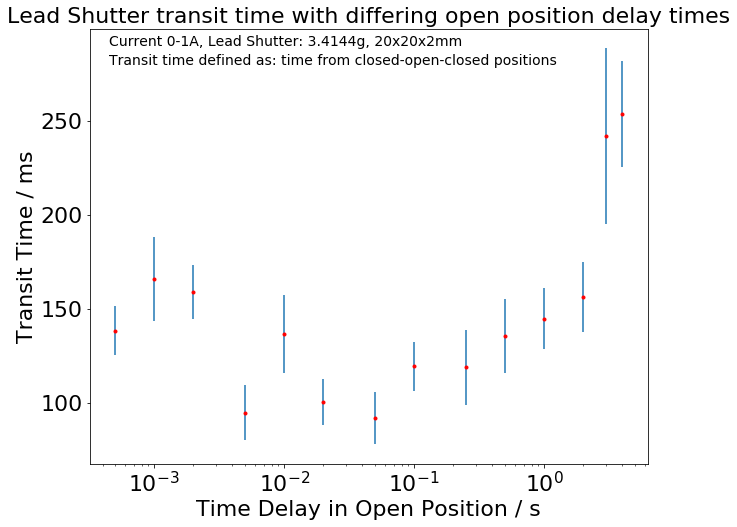

In [132]:
plt.plot(delay_time,avg_vals,'r.')
plt.ylabel('Transit Time / ms')
plt.xlabel('Time Delay in Open Position / s')
plt.errorbar(x=delay_time,y=avg_vals, yerr=avg_std_dev,ls='None')
first_text = 'Current 0-1A, Lead Shutter: 3.4144g, 20x20x2mm'
second_text = 'Transit time defined as: time from closed-open-closed positions'
plt.text(0.00045, 290,first_text,fontsize=14)
plt.text(0.00045, 280,second_text,fontsize=14)
plt.title('Lead Shutter transit time with differing open position delay times')
plt.xscale('log')